![](IMT.jpg)

- <b>Riahi Louriz
- Etudiant en Data Science à IMT Atlantique, campus Brest
- riahilouriz@gmail.com</b>

# Processing outliers 

## Introduction :

"In statistics, an outlier is a value or an observation that is "distant" from other observations made on the same phenomenon, that is, it contrasts greatly with "normally" measured values. An outlier may be due to the variability inherent in the observed phenomenon or it may also indicate an experimental error." (<b>Wikipedia</b>)

Outliers data is a very popular and challenging problem in data mining and machine learning. Data can be an outlier for many reasons which I will not cover here in the introduction, but to give a tangible example : "All individuals have a salary between \$15 000 and \$25 000 except one person who has $100 000. This person will be considered as an outlier". We will explain all outlier data mechanisms later on. Hence, Handling outlier data is an important step in data mining since the majority of  algorithms can not handle accurately outlier values. As a fruit we have a good accuracy and so a good decision making.

Outliers processing is very similar to missing data processing. We will follow the same outline of my last lab, which covers the mechanisms of missing data and how to treat them. To know more about this lab, you can visit the following link:
https://github.com/Louriz/Data-Mining/tree/master/Project

During this lab, we will cover two principal parts: In the first part we will go through some general definitions supported by examples, then a second part which will be  a case study with the language R ( MCA : Multiple Correspondence Analysis).

## Part 1 : definitions and examples

###  Mechanisms of   Outliers Data

Preprocessing outliers data is firstly knowing the reasons behind those outlier values. In the next paragraph we are going to highlight different missing data mechanism with  interesting examples. Let's learn something new !

<b>Causes of outliers can be classified in two broad categories:</b>

    1. Artificial (Error) / Non-natural
    2. Natural

Let's know more deeply about those categories :

#### Artificial (Error) / Non-natural

##### 1.Data Entry Errors :

Human errors such as errors caused during data collection, recording, or entry can give birth to outliers in data. For example: Age of an individual is 50 years . Accidentally, the data entry operator puts an additional zero for the person in question. Now the age becomes 500 years which is 10 times higher. Evidently, this will be the outlier value when compared with rest of the population.

<mark>python simulation :</mark> 

In [5]:
import pandas as pd
entry_errors=pd.DataFrame({'Id':['#12BC5','#75DEG','#89Kwf','#12EC5','#78DEG','#89Kzf','#45iuO','#12458'],'age':[35,40,500,29,24,38,60,55]})
entry_errors

,Id,age
0,#12BC5,35
1,#75DEG,40
2,#89Kwf,500
3,#12EC5,29
4,#78DEG,24
5,#89Kzf,38
6,#45iuO,60
7,#12458,55


##### 2.Measurement Error

It is one of the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty. For example: There are three radars that are installed on satellites to measure climatic variables. But one of these three proves to be defective. The values measured by this defective radar will be larger or smaller considerably, and therefore outliers.

<mark>python simulation</mark> 

In [11]:
import pandas as pd
import numpy as np
measurement_errors=pd.DataFrame({'temperature_radar_1':[22,26,27,25,24,29,30,24],
                                   'temperature_radar_2':[25,26,27,19,28,29,28,24],
                                 'temperature_radar_3' :[100,-20,200,30,12,-1000,20,np.nan]} )
measurement_errors

,temperature_radar_1,temperature_radar_2,temperature_radar_3
0,22,25,100.0
1,26,26,-20.0
2,27,27,200.0
3,25,19,30.0
4,24,28,12.0
5,29,29,-1000.0
6,30,28,20.0
7,24,24,NaN


##### 3.Experimental Error

"Another cause of outliers is experimental error. For example: In a 100m sprint of 7 runners, one runner missed out on concentrating on the ‘Go’ call which caused him to start late. Hence, this caused the runner’s run time to be more than other runners. His total run time can be an outlier." [1]

##### 4.Intentional Outlier:

"This is commonly found in self-reported measures that involves sensitive data. For example: Teens would typically under report the amount of alcohol that they consume. Only a fraction of them would report actual value. Here actual values might look like outliers because rest of the teens are under reporting the consumption." [1]

<mark>python simulation</mark>

In [14]:
import pandas as pd
import numpy as np
intentional_errors=pd.DataFrame({'Id':['#A1245','#B1245','#C1245','#A1275','#B1945','#A1W45','#Acb245','#A1200','#U1245','#K1245'],
                                   'alcohol_times_per_week':[1,1,7,1,0,2,1,6,0,1]} )
intentional_errors

,Id,alcohol_times_per_week
0,#A1245,1
1,#B1245,1
2,#C1245,7
3,#A1275,1
4,#B1945,0
5,#A1W45,2
6,#Acb245,1
7,#A1200,6
8,#U1245,0
9,#K1245,1


- Real values are : 6,7 
- Under reporting values are : 1,1,1,0,2,1,0,1


So it seems that 6 and 7 are the outliers but the reality is the opposite. This is what we call <b>Intentional Outlier</b>.

##### 5.Sampling error

For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample ( they are very tall ;)). This inclusion is likely to cause outliers in the dataset. [1]

![](sampling.JPG)

In [18]:
import pandas as pd
import numpy as np
sampling_errors=pd.DataFrame({'Id':['#A1245','#B1245','#C1245','#A1275','#B1945','#A1200','#U1245','#K1245'],
                                   'athlete_height':[1.70,1.75,1.72,1.65,2.25,2.5,1.62,1.57]} )
sampling_errors

,Id,athlete_height
0,#A1245,1.70
1,#B1245,1.75
2,#C1245,1.72
3,#A1275,1.65
4,#B1945,2.25
5,#A1200,2.50
6,#U1245,1.62
7,#K1245,1.57


#### Natural

When an outiler is not artificial, so it is natural.

### Impact of Outliers 

The existence of outliers can dramatically change the results of our modeling. I will list some impacts of outliers : 

- If the outliers are non-randomly distributed, they can decrease normality [1]. As a result they can impact the basic assumption of linear regression for example.
- They can bias or influence estimates that may be of substantive interest [1].  Especially data exploration stage, where outliers can affect the desired statistics.

let's illustrate with an example :

In [1]:
import pandas as pd
df=pd.DataFrame({'col1_without_outlier':[1,2,4,2,1,5,3],'col2_with_outlier':[1,2,4,100,5,2,3]})
df

,col1_without_outlier,col2_with_outlier
0,1,1
1,2,2
2,4,4
3,2,100
4,1,5
5,5,2
6,3,3


Some statistics :

In [3]:
df.describe()

,col1_without_outlier,col2_with_outlier
count,7.000000,7.000000
mean,2.571429,16.714286
std,1.511858,36.750121
min,1.000000,1.000000
25%,1.500000,2.000000
50%,2.000000,3.000000
75%,3.500000,4.500000
max,5.000000,100.000000


We see very well the impact of the outlier on our statistics. The mean passes from 2.57 to 16.71.

### Types of Outliers

There are two types of outliers, which i will cover one by one followed by examples :

##### 1.Univariate outliers :

These outliers can be found only when we look at the distribution of one single variable.

<b>Example:</b>

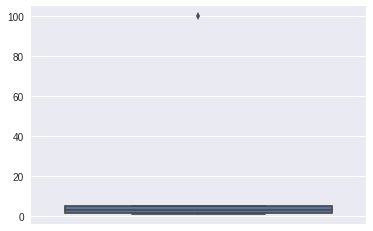

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
univariate=pd.Series([1,1.2,4,2,5,100])
sns.boxplot(univariate,orient='v')

As shown above in the figure, it is clearly that 100 is an outlier. This is an univariate outlier.

#### 2.Multivariate outliers :

Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.[1]

Let's have an example: suppose where are studing the relationship between height and weight.

In [4]:
multivariate=pd.DataFrame({'height(m)':[1.50,1.55,1.60,1.65,1.70,1.75,1.80,1.73,1.50],'weight(kg)':[60,62,64,68,69,69,70,60,70]})
multivariate


,height(m),weight(kg)
0,1.50,60
1,1.55,62
2,1.60,64
3,1.65,68
4,1.70,69
5,1.75,69
6,1.80,70
7,1.73,60
8,1.50,70


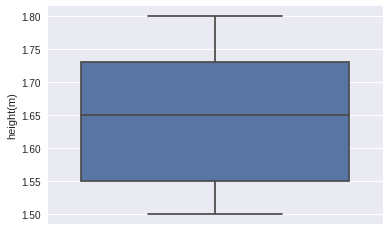

In [4]:
sns.boxplot(multivariate['height(m)'],orient='v')

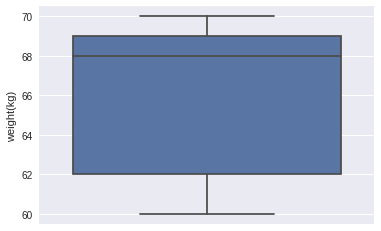

In [5]:
sns.boxplot(multivariate['weight(kg)'],orient='v')

Notice that boxplots do not present any outlier. Let's now explore a 2-dimensional plot to inspect if any outlier exist or not.

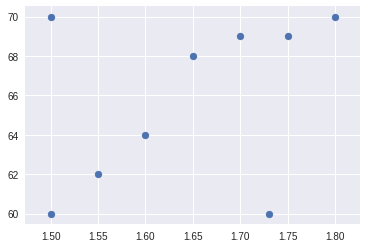

In [6]:
plt.scatter(multivariate['height(m)'], multivariate['weight(kg)'])

Now we have a full idea about 2 outliers in our data (points far from the linear tendency).

### Detect Outliers :

There are many ways to detect outliers and most of them are visual methods. Along our way we have already explored one of them, but I will enumerate some of them :

##### Visualization methods: 

- Boxplots
- Histogram
- Scatter Plot

##### Other methods :

- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR [1]. ( note that IQR= Q3-Q1 the difference between the third and the first quartile). 

- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier. [1]
- Bivariate and multivariate outliers are typically measured using either an index of influence or leverage, or distance. Popular indices such as Mahalanobis’ distance and Cook’s D are frequently used to detect outliers. [1]

<mark>In statistics, <b>the distance of Mahalanobis</b> is a distance measure introduced by Prasanta Chandra Mahalanobis in 19361. It is based on the correlation between variables by which different models can be identified and analyzed. This is a useful way to determine the similarity between a series of known and unknown data. It differs from the Euclidean distance in that it takes into account the variance and correlation of the data set. Thus, unlike the Euclidean distance where all the components of the vectors are treated independently and in the same way, the Mahalanobis distance gives a smaller weight to the most dispersed components.</mark>

Les's give one example about how to detect outliers using Mahalanobis's distance, I will be inspiring from  an example taken from the following link : 
http://kldavenport.com/mahalanobis-distance-and-outliers/

In practice, the Mahalanobis distance from a multivariate vector:

$$x=(x_1,x_2,...,x_p)^T $$

To set of mean values :

$$\mu=(\mu_1,\mu_2,...,\mu_p)^T$$

and having a covariance matrix $$\Sigma$$ is defined as follows:

$$D_M(x)=\sqrt((x-\mu)^T \Sigma ^-1 (x-\mu)) $$

I am going to explore a very simple example using only two vectors x and y ( here p=2)

##### 1. Construct two series of values:

In [5]:
#Going back to our study about the relationship between weight and height :
x=multivariate['height(m)'].values
y=multivariate['weight(kg)'].values
print (x,y)
print(x.shape)
print(y.shape)

[ 1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.73  1.5 ] [60 62 64 68 69 69 70 60 70]
(9,)
(9,)


##### 2. Estimate a covariance matrix for (x,y):

In [6]:
import numpy as np
#compute covariance of x and y :
covariance_xy = np.cov(x,y, rowvar=0) # rowvar is set to 0 because we are dealing with column values.
# In other words we are comparing two features not two individuals.
# inverse the covariance of x and y :
inv_covariance_xy = np.linalg.inv(covariance_xy)

# Examine inverse covariance matrix and shape
print (inv_covariance_xy)
print (inv_covariance_xy.shape)

[[  9.32923013e+01  -8.68116911e-01]
 [ -8.68116911e-01   6.30399581e-02]]
(2, 2)


##### 3.Center each value by the mean:

In [7]:
mean_x=np.mean(x) # mean of the vector x
mean_y=np.mean(y)  # mean of the vector y
x_centered=x-mean_x # center x
y_centered=y-mean_y  # center y 
print(x_centered)
print(y_centered)

[-0.14222222 -0.09222222 -0.04222222  0.00777778  0.05777778  0.10777778
  0.15777778  0.08777778 -0.14222222]
[-5.77777778 -3.77777778 -1.77777778  2.22222222  3.22222222  3.22222222
  4.22222222 -5.77777778  4.22222222]


Join the x_centered and y_centered arrays into (9 x 2) array to be used in our formula later. Consider these coordinate pairs.

In [8]:
diff_xmu=np.transpose([x_centered,y_centered])
diff_xmu.shape, diff_xmu

((9, 2), array([[-0.14222222, -5.77777778],
        [-0.09222222, -3.77777778],
        [-0.04222222, -1.77777778],
        [ 0.00777778,  2.22222222],
        [ 0.05777778,  3.22222222],
        [ 0.10777778,  3.22222222],
        [ 0.15777778,  4.22222222],
        [ 0.08777778, -5.77777778],
        [-0.14222222,  4.22222222]]))

In [11]:
md = []
for i in range(len(diff_xmu)):
    md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xmu[i]),inv_covariance_xy),diff_xmu[i])))
md

[1.6014901629368141,
 1.0431832783584976,
 0.48500141219645976,
 0.53567066739029112,
 0.80169909868717859,
 1.0654800906169462,
 1.5131404630059275,
 1.9245273828577079,
 2.0133205148567508]

###### We can wrap all this sequential code up into one function as follows:

In [14]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    mean_x=np.mean(x) # mean of the vector x
    mean_y=np.mean(y)  # mean of the vector y
    x_centered=x-mean_x # center x
    y_centered=y-mean_y  # center y 
    diff_xmu = np.transpose([x_centered, y_centered])
    
    md = []
    for i in range(len(diff_xmu)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xmu[i]),inv_covariance_xy),diff_xmu[i])))
    return md

In [15]:
MahalanobisDist(x,y)

[1.6014901629368141,
 1.0431832783584976,
 0.48500141219645976,
 0.53567066739029112,
 0.80169909868717859,
 1.0654800906169462,
 1.5131404630059275,
 1.9245273828577079,
 2.0133205148567508]

In [16]:
def MD_removeOutliers(x, y):
    MD = MahalanobisDist(x, y)
    threshold = np.mean(MD) * 1.5 # adjust 1.5 accordingly 
    nx, ny, outliers = [], [], []
    for i in range(len(MD)):
        if MD[i] <= threshold:
            nx.append(x[i])
            ny.append(y[i])
        else:
            outliers.append(i) # position of removed pair
    return (np.array(nx), np.array(ny), np.array(outliers))

In [17]:
print ('x:', x)
print ('y:', y)
MD_removeOutliers(x,y)

x: [ 1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.73  1.5 ]
y: [60 62 64 68 69 69 70 60 70]


(array([ 1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,  1.8 ]),
 array([60, 62, 64, 68, 69, 69, 70]),
 array([7, 8]))

Outliers are in position 7 and 8 which are the couples (1.73,60) and (1.5,70). Ohh! impossible!, do you remember those couples. Go back to scatter plot for height and weight( I ploted it again below). Nice isn't it ?

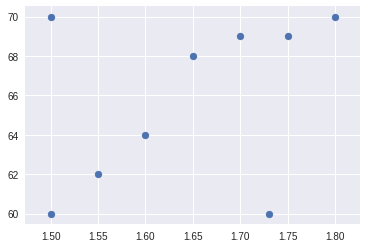

In [18]:
plt.scatter(multivariate['height(m)'], multivariate['weight(kg)'])

Now you have a very strong way to identify outliers, why? because scatter plot can be only used in 2-D or 3-D, but in case you have many features in your dataset it is more easy to use Mahalanobis Distance.


### Precess Outliers : 

As said above in the introduction, processing outliers is very similar to processing missing values. Such as deleting rows or columns with outliers, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods.

#### Deleting observations : 

We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers.[1]

<mark>Note that deleting outliers that are due to data entry error does not affect  bias the result of your model. It is like MCAR missing values.</mark>

#### Transforming and binning values :

Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values. Binning is also a form of variable transformation. Decision Tree algorithm allows to deal with outliers well due to binning of variable. We can also use the process of assigning weights to different observations.[1]

#### Imputing :

Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier observation and after that we can impute it with predicted values.
To know more about imputing missing values: 
https://github.com/Louriz/Data-Mining/tree/master/Project

#### Treat separately :

 If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.[1]

## Part2 : Case study 

During my last project in statistics, I was doing MCA(  Multiple Correspondence Analysis) for our survey data about MOOC. When I have done the first MCA I was very angry about the result because they are non-sense, but with more exploration I have found that there is an outlier ( only one !) who ruined my life for two days :). As a result of deleting this individual from the data, I have got a very good result regarding our set of goals.

To change the language in which we are working now, I will provide you my study using the R language.
You find in my Github account the pdf document with details entitled:

# Conclusion

During this lab, you have explored many mechanisms that can be behind outliers, and also how to identify them in order to process those  values either separately or transforming them using similar methods used in processing missing values.

Good luck in your future learning :).

# References : 

[1] https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#three

[2] https://machinelearningmastery.com/how-to-identify-outliers-in-your-data/